<font face="Helvetica" size=6.9 color='#972c6b'> **Used Vehicle Product Analysis** <font>

<font face="Helvetica" size=4> **Group A10** <font>

*   <font face="Helvetica" size=3> Rick Wang
*   Ohm Srikiatkhachorn
*   Nan Li
*   Kendall Sims
*   Jay Singh
*   Ari Kolahal<font>

<font face="Helvetica" size=4> **Table of Contents** <font>


1.<font face="Helvetica" size=3>   Executive Summary <font>

2.<font face="Helvetica" size=3>   Project Proposal<font>
  * <font face="Helvetica" size=3>  Introduction<font>
  * <font face="Helvetica" size=3> Motivation <font>

3.<font face="Helvetica" size=3> Data & its Source<font>
* <font face="Helvetica" size=3>  Data Dictonary <font>


4.<font face="Helvetica" size=3>     Data Cleaning and Manipulation <font>

5.<font face="Helvetica" size=3> Exploratory Data Analysis & Questions<font>

6.Conclusions

7.Reference

8.<font face="Helvetica" size=3> Generative AI Disclosure <font>

<font face="Helvetica" size=6 color=972c6b> **Executive Summary** <font>

----
This report analyzes the factors affecting used car prices in the US and the UK. Using Python libraries like pandas, matplotlib, seaborn, and numpy, we examined key features (brand, model, transmission type, fuel type, mileage, engine size, and mpg) to identify trends in pricing. Before conducting our analyses, we performed data cleaning, merged the US and UK datasets, and consulted external resources on used car pricing to help form hypotheses and provide context. Our goal is to assist sellers in the US and the UK with setting competitive prices based on car features and to help buyers ensure they are paying fair prices. Ultimately, we seek to provide insights that maximize profits for sellers and help buyers get the best deals.

The most popular car brands in our dataset are Ford, Mercades, Volkswagen, Vauxhall, and BMW. Key findings from our dataset reveal that the majority of the top car brands are from Germany or the US, making these two countries dominant in car manufacturing. We found that mileage, mpg, and engine size have the strongest correlation with price, with engine size showing significant variability, likely influenced by luxury or high-performance models. On average, US cars are more expensive than UK cars. Additionally, petrol and diesel fueled cars are predominately manual, while hybrid cars are mostly automatic. Hybrid cars tend to be more expensive than petrol or diesel vehicles, making them less accessible to the average consumer. This pricing trend contributes to environmental concerns, as more affordable petrol and diesel cars continue to dominate the market, leading to climate change and air pollution.

<font face="Helvetica" size=6 color=972c6b> **Project Proposal** <font>












<font face="Helvetica" size=5 color=2e062f> **Introduction** <font>

---

The automotive industry is characterized by an abundance of vehicles equipped with rapidly advancing technology and rising prices. Simultaneously, inflation and growing concerns about climate change present significant challenges. This raises a critical question: How can we maintain a vehicle that is both environmentally sustainable and technologically advanced?

One solution is the purchase of second-hand vehicles. In the United Kingdom, the used car market is projected to grow from USD 58.12 billion in 2024 to USD 89.32 billion by 2029, with a compound annual growth rate of 11.70%. In the United States, the market was valued at USD 195.84 billion in 2021 and is expected to reach USD 302.47 billion by 2027.



<font face="Helvetica" size=5, color = 2e062f> **Motivation** <font>

---

The vehicle market has historically lacked transparency, with prices often dictated by dealers. This is particularly challenging for individuals looking to trade in or sell their cars, as they typically lack clear pricing benchmarks and informed negotiation strategies. In this project, Team 10 aims to analyze used vehicle sales data from the United States and the United Kingdom to provide valuable insights into the key factors that affect a car's value. This will equip sellers with a reliable pricing reference, enabling more effective negotiations with dealers. Additionally, the analysis will help buyers secure better deals aligned with market trends.



<font face="Helvetica" size=6 color=972c6b> **Data & its Source** <font>

----
The data utilized for this project comes from two sources:

1.[**UK Used Car Dataset**:](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes)<font>
* Consists of 100,000 used car sales data rows distributed into 11 datasets with 9-11 columns.
* In order to conduct proper analysis, these datasets were merged with the common set of columns across the datasets.

2.[**US Used Car Dataset**:](https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset)
* Consists of 4,000 used car sales data rows distributed across 12 columns.
* This dataset was later merged with the UK car sales data and the relevant columns were retained for the analysis.

At the end of the the cleaning process, the following represents the metadata:





<font face="Helvetica" size=5 color=2e062f> **Data Dictionary** <font>

---

Column | Description | Data Type
------ | ----------- | ---------
**brand** | The brand of the car. | ``categorical``
**model** | The model of the car. | ``categorical``
**year** | The year the car was manufactured. | ``datetime``
**transmission** | Type of transmission. | ``categorical``
**mileage** | The total mileage on the car (in miles); as a key indicator of wear and potential maintenance requirements. | ``numeric``
**fuel_Type** | Type of fuel used.| ``categorical``
**engine_size** | The capacity of the car engine (in litres). | ``numeric``
**tax** |  The tax amount for the car. | `numeric`
**mpg** | Miles per gallon; as a key indicator of fuel efficiency | ``numeric``
**country** | The country where the car was sold. | ``numeric``
**price** | The price at which the car was sold.| `numeric`


<font face="Helvetica" size=6 color=972c6b> **Data Cleaning & Manipulation** <font>

----

<font face="Helvetica" size=4 color=2e062f> **Importing Required Libraries** <font>
---

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<font face="Helvetica" size=4 color=2e062f> **Data Cleaning and Transformation** <font>
---

During the data cleaning phase, we had a total of 13 files that needed to be cleaned and merged. First, we added a "brand" column and a "country" column to all the files to ensure that each observation was unique and non-redundant. Next, we standardized the data into a uniform format and consolidated the different names used across the files (e.g., some files used "Merc," "merc," or "Mercedes-Benz"). We also standardized the data types throughout the dataset.

Before concatenating the UK and USA datasets, we converted the prices in pounds to US dollars. For handling missing values, we grouped the data by brand and filled the missing values with the average numbers for the corresponding brand. If no reference brand data was available, we used the overall average value to fill the null value.

<font face="Helvetica" size=3> **Cleaning the USA Dataset** <font>

In [145]:
#Import Dataset with required fields
usa = pd.read_csv("/content/used_cars_USA.csv")
usa = usa[['brand', 'model', 'model_year', 'transmission', 'milage', 'fuel_type', 'engine', 'price' ]]

#Dropping null values
usa = usa.dropna()
#usa = usa.sort_values('brand').reset_index(drop = True)

# Tidying the data within the columns
usa['engine'] = usa['engine'].str.replace('Liter', 'L')
usa['engine_size'] = usa['engine'].str.extract(r'(\d+\.\d+L)')
usa['engine_size'] = usa['engine_size'].str.replace('L', '')

usa['milage'] =usa['milage'].str.replace('mi', '').str.replace(',', '').str.replace('.', '').str.strip()

usa['price'] = usa['price'].str.replace('$', '')

usa['transmission'] = usa['transmission'].str.replace(r'4-Speed A/T|Variable|Transmission Overdrive Switch|A/T|9-Speed A/T|6-Speed A/T|10-Speed Automatic|8-Speed A/T|Automatic|10-Speed A/T|9-Speed Automatic|5-Speed A/T|7-Speed A/T|Automatic, 8-Spd|8-Speed Automatic|1-Speed Automatic|Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes|Automatic, 8-Spd Sport w/Sport & Manual Modes|8-SPEED A/T|Automatic CVT|6-Speed Automatic|10-Speed Automatic with Overdrive|4-Speed Automatic|6-Speed Electronically Controlled Automatic with O|5-Speed Automatic|7-Speed DCT Automatic|CVT Transmission|7-Speed Automatic|8-SPEED AT|Automatic, 10-Spd|Automatic, 9-Spd 9G-Tronic|CVT-F','Automatic',regex=True)
usa['transmission'] = usa['transmission'].str.replace(r'6-Speed M/T|5-Speed M/T|M/T|6-Speed Manual|7-Speed M/T|8-Speed Manual|Manual|7-Speed Manual|Manual, 6-Spd|6 Speed Mt', 'Manual', regex = True)
usa['transmission'] = usa['transmission'].str.replace(r'6 Speed At/Mt|Automatic, 8-Spd PDK Dual-Clutch|Automatic, 8-Spd Dual-Clutch|Auto, 6-Spd w/CmdShft|6-Speed Automatic with Auto-Shift|Automatic, 7-Spd S tronic Dual-Clutch|7-Speed Automatic with Auto-Shift|8-Speed Automatic with Auto-Shift|Transmission w/Dual Shift Mode|9-Speed Automatic with Auto-Shift', 'Semi-Auto', regex = True)
usa2 = usa.loc[usa['transmission'].isin(['Automatic', 'Manual', 'Semi-Auto'])]

# Standardizing the format of the dataset
usa2 = usa2[~usa2['engine_size'].isna()]
usa2 = usa2.drop('engine', axis = 1)
usa2 = usa2.reset_index(drop=True)
usa2 = usa2.rename(columns = {'model_year': 'year', 'milage': 'mileage','fuel_type':'fuelType'})
usa2['country'] = 'USA'
usa2['mpg'] = 'NA'
usa2['tax'] = 'NA'
usa2 = usa2[['brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'engine_size', 'tax', 'mpg', 'country', 'price']]

#satndardizing the data type
usa2["price"] = usa2["price"].str.replace(",", "").str.strip()
usa2['price'] = usa2['price'].astype(int)
print(usa2["price"])
# standardizeing the name of brand to match UK's name
usa2['brand'] = usa2['brand'].replace('Mercedes-Benz', 'Merc')

# Saving dataframe as csv to local drive
#usa2.to_csv('clean_USA.csv', index=False)
print("The USA Clean Data File has been saved.")
USA_cars = usa2

0        10300
1        38005
2        15500
3        34999
4        31000
         ...  
3516    175000
3517     25900
3518     53900
3519     62999
3520     40000
Name: price, Length: 3521, dtype: int64
The USA Clean Data File has been saved.


<font face="Helvetica" size=3> **Cleaning the Focus Dataset** <font>

In [146]:
#read the data
df_focus = pd.read_csv("/content/unclean focus.csv")
# Drop complete duplicates
df_focus.drop_duplicates(inplace=True)

# Drop rows where all values are NaN
df_focus.dropna(how='all',inplace=True)

# Cleaning the price column
# Remove the pound sign and any comma
df_focus['price_numeric'] = df_focus['price'].str.replace('£', '').str.replace(',','').str.strip()

# Drop the rows where price values are missing
df_focus = df_focus.dropna(subset=['price_numeric'])

# Convert the price value to int64
df_focus['price_numeric'] = pd.to_numeric(df_focus['price_numeric'],errors='coerce').astype('int64')
df_focus['price_cleaned'] = df_focus['price_numeric']

# Cleaning the year column
# Fill NaN with 0
df_focus['year'].fillna(0, inplace=True)

# Convert to numeric first, handling any errors by converting invalid entries to NaN
df_focus['year_numeric'] = pd.to_numeric(df_focus['year'], errors='coerce')

# Now convert to int64, filling NaN with 0 (in case there are still invalid entries)
df_focus['year_cleaned'] = df_focus['year_numeric'].fillna(0).astype('int64')

# Cleaning the fuel type columns
df_focus['fuel type'].astype('str').str.capitalize()
df_focus['fuel type2'].astype('str').str.capitalize()

# Combine the two columns together
df_focus.loc[~df_focus['fuel type'].isin(['Petrol', 'Diesel']), 'fuel type'] = df_focus['fuel type2']
df_focus = df_focus.rename(columns= {'fuel type':'fuel_type_cleaned'})

# Cleaning mileage and mpg data
df_focus= df_focus.rename(columns={"mileage2": "mpg"})

# Remove commas from string values
df_focus['mileage'] = df_focus['mileage'].str.replace(',', '').str.strip()
df_focus['mpg'] = df_focus['mpg'].str.replace(',', '').str.strip()

# Convert str values in mpg to numeric values
df_focus['mpg'] = pd.to_numeric(df_focus['mpg'],errors='coerce').astype('float64')

# Fill NaN in mileage column wtth mpg values
df_focus['mileage'] = df_focus['mileage'].fillna(df_focus['mpg'])

# Convert str values in mileage column to numeric values
df_focus['mileage'] = pd.to_numeric(df_focus['mileage'],errors='coerce')

# Replace the null value in mileage with the average
df_focus['mileage'] = df_focus['mileage'].fillna(df_focus['mileage'].mean())
# Convert datatypes
df_focus['mileage'] = df_focus['mileage'].astype('int64')

# Fill the missing mpg values with the average mpg
mpg_means = np.mean(df_focus.loc[df_focus['mpg'] < 100, 'mpg'])

df_focus.loc[df_focus['mpg']>=100,'mpg'] = mpg_means
df_focus['mpg'].fillna(mpg_means,inplace=True)
df_focus['mpg'] = df_focus['mpg'].round(1)

# Cleaning engine size columns
# Convert the cleaned 'engine size' column to numeric values
df_focus['engine size'] = pd.to_numeric(df_focus['engine size'], errors='coerce')
df_focus['engine size2']= pd.to_numeric(df_focus['engine size2'],errors='coerce')

 #By exploring the missing values of engine size and engine size2
 #it seems highly likely that the engine size data was split into two columns: engine size,engine size2

# Fill NaN values with 0
df_focus['engine size'].fillna(0,inplace = True)
df_focus['engine size2'].fillna(0,inplace = True)

# Convert unit in cc into liter
df_focus.loc[df_focus['engine size'] > 100 ,'engine size'] = df_focus['engine size']/1000
df_focus.loc[df_focus['engine size2'] > 100 ,'engine size2'] = df_focus['engine size2']/1000

# Create a new column where engine size is not 0, otherwise use the values in the column of engine size2
df_focus['engine_size_cleaned'] = np.where(df_focus['engine size'] !=0, df_focus['engine size'], df_focus['engine size2'])
df_focus['engine_size_cleaned']= df_focus['engine_size_cleaned'].round(1)

# Drop unwanted columns and rename the remaining columns
df_focus = df_focus.drop(columns=['engine size','engine size2','fuel type2','reference','price','price_numeric','year','year_numeric'],axis=1)
df_focus = df_focus.rename(columns={'fuel_type_cleaned':'fuel_type','price_cleaned':'price','year_cleaned':'year','engine_size_cleaned':'engine_size'})

# Insert relevant columns：brand, tax, country
df_focus['brand']= 'Ford'
df_focus['tax'] = np.nan
df_focus['country'] = 'UK'

# Rearrange the order of columns
new_order = ['brand','model','year','transmission','mileage','fuel_type','engine_size','tax','mpg','country','price']
df_focus = df_focus[new_order]
df_focus = df_focus.rename(columns={'fuel_type' : 'fuelType'})
# assign path and file name
folder_path = ''
file_name = 'clean_focus.csv'
file_path = folder_path + file_name

# save dataframe as csv
df_focus.to_csv(file_path, index=False)
print(f'File has been saved to {file_path}')

File has been saved to clean_focus.csv


<ipython-input-146-9a970e5f56ee>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_focus['year'].fillna(0, inplace=True)
<ipython-input-146-9a970e5f56ee>:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

<font face="Helvetica" size=3> **Cleaning the C-Class Dataset** <font>

In [147]:
# CSV file manually uploaded to Google Colab
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

unclean_cclass = pd.read_csv('/content/unclean cclass.csv')

# Dropping all the empty rows
unclean_cclass_v1 = unclean_cclass.dropna(how='all')

# Looking at the data we understand that mileage2 is mpg, therefore changing its name

unclean_cclass_v2 = unclean_cclass_v1.rename(columns={"mileage2": "mpg"})

# Removing the ',' from mpg values as it creates error while converting to float

unclean_cclass_v2['mpg'] = unclean_cclass_v2['mpg'].str.replace(',', '')

# Converting 'mpg' column to float from object

unclean_cclass_v2['mpg'] = pd.to_numeric(unclean_cclass_v2['mpg'], errors='coerce').astype(float)

# Removing commas from the str values
unclean_cclass_v2['mileage'] = unclean_cclass_v2['mileage'].str.replace(',', '')

# As our theory was correct. Replacing the null vales of mileage with the mpg column
unclean_cclass_v2['mileage'] = unclean_cclass_v2['mileage'].fillna(unclean_cclass_v2['mpg'])

# Converting all the values in the column to float so that all become the same type
unclean_cclass_v2['mileage'] = pd.to_numeric(unclean_cclass_v2['mileage'], errors='coerce').astype(float)

# Replacing the remaining null values with the mean value
unclean_cclass_v2['mileage'] = unclean_cclass_v2['mileage'].fillna(unclean_cclass_v2['mileage'].mean())

# Converting the column into required format
unclean_cclass_v2['mileage'] = unclean_cclass_v2['mileage'].astype(int)

# Dropping the null values in Year
unclean_cclass_v3 = unclean_cclass_v2.dropna(subset=['year'])

# Converting the year into required format
unclean_cclass_v3['year'] = unclean_cclass_v3['year'].astype(int)

unclean_cclass_v3[~unclean_cclass_v3['fuel type2'].isin(['Petrol','Diesel','Hybrid'])]

# Some fuel type values were populated in fuel type and some in fuel type2. Combining both the values

unclean_cclass_v3['fuel type2'] = unclean_cclass_v3['fuel type2'].fillna(unclean_cclass_v3['fuel type'])

# Dropping one of the fuel type columns
unclean_cclass_v4 = unclean_cclass_v3.drop('fuel type', axis=1)

unclean_cclass_v4 = unclean_cclass_v4.rename(columns={"fuel type2": "fuelType"})

unclean_cclass_v4['engine size2'] = pd.to_numeric(unclean_cclass_v4['engine size2'], errors='coerce').astype(float)

unclean_cclass_v4['engine size'] = pd.to_numeric(unclean_cclass_v4['engine size'], errors='coerce').astype(float)

unclean_cclass_v4['engine size2'] = unclean_cclass_v4['engine size2'].fillna(unclean_cclass_v3['engine size'])

# Dropping one of the engine size columns
unclean_cclass_v4 = unclean_cclass_v4.drop('engine size', axis=1)

unclean_cclass_v4 = unclean_cclass_v4.rename(columns={"engine size2": "engine_size"})

unclean_cclass_v4 = unclean_cclass_v4.drop('reference', axis=1)

unclean_cclass_v4['brand'] = 'Mercedes'
unclean_cclass_v4['country'] = 'UK'

# fill Na in mpg by average value
unclean_cclass_v4["mpg"] = unclean_cclass_v4["mpg"].fillna(unclean_cclass_v4.mpg.mean())
# add tax column, and value it as Nan
unclean_cclass_v4["tax"] = np.nan

sequence = ["brand", "model", "year", "transmission", "mileage", "fuelType", "engine_size", "tax", "mpg", "country", "price"]
unclean_cclass_v4 = unclean_cclass_v4[sequence]

# remove the currency sign
unclean_cclass_v4['price'] = unclean_cclass_v4['price'].str.replace('£', '', regex=False)
# remove commas and stripping any spaces
unclean_cclass_v4['price'] = unclean_cclass_v4['price'].str.replace(',', '').str.strip()
# Convert the column to numeric type
unclean_cclass_v4['price'] = unclean_cclass_v4['price'].astype(int)

# Convert the column to numeric type
unclean_cclass_v4['engine_size'] = unclean_cclass_v4['engine_size'].str.replace('£', '', regex=False)
unclean_cclass_v4['engine_size'] = unclean_cclass_v4['engine_size'].str.replace('CC', '', regex=False)
unclean_cclass_v4['engine_size'] = unclean_cclass_v4['engine_size'].str.replace(',', '').str.strip()
unclean_cclass_v4['engine_size'] = unclean_cclass_v4['engine_size'].astype(float)

unclean_cclass_v4["brand"] = unclean_cclass_v4["brand"].replace("Mercedes", "Merc")

unclean_cclass_v4.to_csv('clean_cclass.csv', index=False)

<ipython-input-147-eb4c652c6101>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unclean_cclass_v3['year'] = unclean_cclass_v3['year'].astype(int)
<ipython-input-147-eb4c652c6101>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unclean_cclass_v3['fuel type2'] = unclean_cclass_v3['fuel type2'].fillna(unclean_cclass_v3['fuel type'])


<font face="Helvetica" size=3> **Cleaning the Audi Dataset** <font>

In [148]:
df_audi = pd.read_csv("audi.csv")
#If want to rename column, use this one
df_audi.rename(columns={'engineSize': 'engine_size'}, inplace=True)
# add a new column and give the value
df_audi["brand"] = "Audi"
df_audi["country"] = "UK"
# reset sequence
sequence = ["brand", "model", "year", "transmission", "mileage", "fuelType", "engine_size", "tax", "mpg", "country", "price"]
df_audi = df_audi[sequence]
df_audi.info()
df_audi.head()

# assign path and file name
folder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'
file_name = 'clean_Audi.csv'
file_path = folder_path + file_name

# save dataframe as csv
df_audi.to_csv(file_path, index=False)
print(f'File has been saved to {file_path}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         10668 non-null  object 
 1   model         10668 non-null  object 
 2   year          10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   engine_size   10668 non-null  float64
 7   tax           10668 non-null  int64  
 8   mpg           10668 non-null  float64
 9   country       10668 non-null  object 
 10  price         10668 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 916.9+ KB
File has been saved to C:\Users\Rick\OneDrive\Desktop\BA815_project\clean_data\clean_Audi.csv


<font face="Helvetica" size=3> **Cleaning the BMW Dataset** <font>

In [149]:
df_bmw = pd.read_csv("bmw.csv")
#If want to rename column, use this one
df_bmw.rename(columns={'engineSize': 'engine_size'}, inplace=True)
# add a new column and give the value
df_bmw["brand"] = "BMW"
df_bmw["country"] = "UK"
# reset sequence
sequence = ["brand", "model", "year", "transmission", "mileage", "fuelType", "engine_size", "tax", "mpg", "country", "price"]
df_bmw = df_bmw[sequence]
df_bmw.info()
df_bmw.head()

# assign path and file name
folder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'
file_name = 'clean_bmw.csv'
file_path = folder_path + file_name

# save dataframe as csv
df_bmw.to_csv(file_path, index=False)
print(f'File has been saved to {file_path}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         10781 non-null  object 
 1   model         10781 non-null  object 
 2   year          10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   engine_size   10781 non-null  float64
 7   tax           10781 non-null  int64  
 8   mpg           10781 non-null  float64
 9   country       10781 non-null  object 
 10  price         10781 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 926.6+ KB
File has been saved to C:\Users\Rick\OneDrive\Desktop\BA815_project\clean_data\clean_bmw.csv


<font face="Helvetica" size=3> **Cleaning the Ford Dataset** <font>

In [150]:
df_ford = pd.read_csv("ford.csv")
#If want to rename column, use this one
df_ford.rename(columns={'engineSize': 'engine_size'}, inplace=True)
# add a new column and give the value
df_ford["brand"] = "Ford"
df_ford["country"] = "UK"
# reset sequence
sequence = ["brand", "model", "year", "transmission", "mileage", "fuelType", "engine_size", "tax", "mpg", "country", "price"]
df_ford = df_ford[sequence]
df_ford.info()
df_ford.head()

# assign path and file name
folder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'
file_name = 'clean_ford.csv'
file_path = folder_path + file_name

# save dataframe as csv
df_ford.to_csv(file_path, index=False)
print(f'File has been saved to {file_path}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         17965 non-null  object 
 1   model         17965 non-null  object 
 2   year          17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   engine_size   17965 non-null  float64
 7   tax           17965 non-null  int64  
 8   mpg           17965 non-null  float64
 9   country       17965 non-null  object 
 10  price         17965 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.5+ MB
File has been saved to C:\Users\Rick\OneDrive\Desktop\BA815_project\clean_data\clean_ford.csv


<font face="Helvetica" size=3> **Cleaning the Hyundai Dataset** <font>

In [151]:
df_hyundai = pd.read_csv("hyundi.csv")
#If want to rename column, use this one
df_hyundai.rename(columns={'engineSize': 'engine_size'}, inplace=True)
# add a new column and give the value
df_hyundai.rename(columns={ 'tax(£)': 'tax'}, inplace=True)
df_hyundai["brand"] = "Hyundai"
df_hyundai["country"] = "UK"
# reset sequence
sequence = ["brand", "model", "year", "transmission", "mileage", "fuelType", "engine_size", "tax", "mpg", "country", "price"]
df_hyundai = df_hyundai[sequence]
df_hyundai.info()
df_hyundai.head()

# assign path and file name
folder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'
file_name = 'clean_hyundai.csv'
file_path = folder_path + file_name

# save dataframe as csv
df_hyundai.to_csv(file_path, index=False)
print(f'File has been saved to {file_path}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4860 non-null   object 
 1   model         4860 non-null   object 
 2   year          4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   engine_size   4860 non-null   float64
 7   tax           4860 non-null   int64  
 8   mpg           4860 non-null   float64
 9   country       4860 non-null   object 
 10  price         4860 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 417.8+ KB
File has been saved to C:\Users\Rick\OneDrive\Desktop\BA815_project\clean_data\clean_hyundai.csv


<font face="Helvetica" size=3> **Cleaning the Merc (Mercedes) Dataset** <font>

In [152]:
df_merc = pd.read_csv("merc.csv")
#If want to rename column, use this one
df_merc.rename(columns={'engineSize': 'engine_size'}, inplace=True)
# add a new column and give the value
df_merc["brand"] = "Merc"
df_merc["country"] = "UK"
# reset sequence
sequence = ["brand", "model", "year", "transmission", "mileage", "fuelType", "engine_size", "tax", "mpg", "country", "price"]
df_merc = df_merc[sequence]
print(df_merc.info())
print(df_merc.head())

# assign path and file name
folder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'
file_name = 'clean_merc.csv'
file_path = folder_path + file_name

# save dataframe as csv
df_merc.to_csv(file_path, index=False)
print(f'File has been saved to {file_path}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         13119 non-null  object 
 1   model         13119 non-null  object 
 2   year          13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   engine_size   13119 non-null  float64
 7   tax           13119 non-null  int64  
 8   mpg           13119 non-null  float64
 9   country       13119 non-null  object 
 10  price         13119 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB
None
  brand      model  year transmission  mileage fuelType  engine_size  tax  \
0  Merc        SLK  2005    Automatic    63000   Petrol          1.8  325   
1  Merc    S Class  2017    Automatic    27000   Hybrid          2.1   20   
2  Merc   SL CLASS  2016    Automa

<font face="Helvetica" size=3> **Cleaning the Skoda Dataset** <font>

In [153]:
df_skoda = pd.read_csv("skoda.csv")
#If want to rename column, use this one
df_skoda.rename(columns={'engineSize': 'engine_size'}, inplace=True)
# add a new column and give the value
df_skoda["brand"] = "Skoda"
df_skoda["country"] = "UK"
# reset sequence
sequence = ["brand", "model", "year", "transmission", "mileage", "fuelType", "engine_size", "tax", "mpg", "country", "price"]
df_skoda = df_skoda[sequence]
print(df_skoda.info())
print(df_skoda.head())

# assign path and file name
folder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'
file_name = 'clean_skoda.csv'
file_path = folder_path + file_name

# save dataframe as csv
df_skoda.to_csv(file_path, index=False)
print(f'File has been saved to {file_path}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         6267 non-null   object 
 1   model         6267 non-null   object 
 2   year          6267 non-null   int64  
 3   transmission  6267 non-null   object 
 4   mileage       6267 non-null   int64  
 5   fuelType      6267 non-null   object 
 6   engine_size   6267 non-null   float64
 7   tax           6267 non-null   int64  
 8   mpg           6267 non-null   float64
 9   country       6267 non-null   object 
 10  price         6267 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 538.7+ KB
None
   brand          model  year transmission  mileage fuelType  engine_size  \
0  Skoda        Octavia  2017       Manual    25250   Petrol          1.4   
1  Skoda         Citigo  2018       Manual     1264   Petrol          1.0   
2  Skoda        Octavia  2019    A

<font face="Helvetica" size=3> **Cleaning the Toyota Dataset** <font>

In [154]:
df_toyota = pd.read_csv("toyota.csv")
#If want to rename column, use this one
df_toyota.rename(columns={'engineSize': 'engine_size'}, inplace=True)
# add a new column and give the value
df_toyota["brand"] = "Toyota"
df_toyota["country"] = "UK"
# reset sequence
sequence = ["brand", "model", "year", "transmission", "mileage", "fuelType", "engine_size", "tax", "mpg", "country", "price"]
df_toyota = df_toyota[sequence]
print(df_toyota.info())
print(df_toyota.head())

# assign path and file name
folder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'
file_name = 'clean_toyota.csv'
file_path = folder_path + file_name

# save dataframe as csv
df_toyota.to_csv(file_path, index=False)
print(f'File has been saved to {file_path}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         6738 non-null   object 
 1   model         6738 non-null   object 
 2   year          6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   engine_size   6738 non-null   float64
 7   tax           6738 non-null   int64  
 8   mpg           6738 non-null   float64
 9   country       6738 non-null   object 
 10  price         6738 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 579.2+ KB
None
    brand  model  year transmission  mileage fuelType  engine_size  tax   mpg  \
0  Toyota   GT86  2016       Manual    24089   Petrol          2.0  265  36.2   
1  Toyota   GT86  2017       Manual    18615   Petrol          2.0  145  36.2   
2  Toyota   GT86  2015

<font face="Helvetica" size=3> **Cleaning the Vauxhall Dataset** <font>

In [155]:
df_vauxhall = pd.read_csv("vauxhall.csv")
#If want to rename column, use this one
df_vauxhall.rename(columns={'engineSize': 'engine_size'}, inplace=True)
# add a new column and give the value
df_vauxhall["brand"] = "Vauxhall"
df_vauxhall["country"] = "UK"
# reset sequence
sequence = ["brand", "model", "year", "transmission", "mileage", "fuelType", "engine_size", "tax", "mpg", "country", "price"]
df_vauxhall = df_vauxhall[sequence]
print(df_vauxhall.info())
print(df_vauxhall.head())

# assign path and file name
folder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'
file_name = 'clean_vauxhall.csv'
file_path = folder_path + file_name

# save dataframe as csv
df_vauxhall.to_csv(file_path, index=False)
print(f'File has been saved to {file_path}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13632 entries, 0 to 13631
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         13632 non-null  object 
 1   model         13632 non-null  object 
 2   year          13632 non-null  int64  
 3   transmission  13632 non-null  object 
 4   mileage       13632 non-null  int64  
 5   fuelType      13632 non-null  object 
 6   engine_size   13632 non-null  float64
 7   tax           13632 non-null  int64  
 8   mpg           13632 non-null  float64
 9   country       13632 non-null  object 
 10  price         13632 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB
None
      brand   model  year transmission  mileage fuelType  engine_size  tax  \
0  Vauxhall   Corsa  2018       Manual     9876   Petrol          1.4  145   
1  Vauxhall   Corsa  2019       Manual     2500   Petrol          1.4  145   
2  Vauxhall   Corsa  2017    Au

<font face="Helvetica" size=3> **Cleaning the Volkswagen Dataset** <font>

In [156]:
df_vw = pd.read_csv("vw.csv")
#If want to rename column, use this one
df_vw.rename(columns={'engineSize': 'engine_size'}, inplace=True)
# add a new column and give the value
df_vw["brand"] = "Volkswagen"
df_vw["country"] = "UK"
# reset sequence
sequence = ["brand", "model", "year", "transmission", "mileage", "fuelType", "engine_size", "tax", "mpg", "country", "price"]
df_vw = df_vw[sequence]
print(df_vw.info())
print(df_vw.head())

# assign path and file name
folder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'
file_name = 'clean_vw.csv'
file_path = folder_path + file_name

# save dataframe as csv
df_vw.to_csv(file_path, index=False)
print(f'File has been saved to {file_path}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         15157 non-null  object 
 1   model         15157 non-null  object 
 2   year          15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   engine_size   15157 non-null  float64
 7   tax           15157 non-null  int64  
 8   mpg           15157 non-null  float64
 9   country       15157 non-null  object 
 10  price         15157 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.3+ MB
None
        brand   model  year transmission  mileage fuelType  engine_size  tax  \
0  Volkswagen   T-Roc  2019    Automatic    13904   Diesel          2.0  145   
1  Volkswagen   T-Roc  2019    Automatic     4562   Diesel          2.0  145   
2  Volkswagen   T-Roc  20

<font face="Helvetica" size=3> **Importing and Concatenating data from UK** <font>

In [157]:
# import UK dataset
audi = pd.read_csv("/content/clean_USA.csv")
bmw = pd.read_csv("/content/clean_bmw.csv")
ford = pd.read_csv("/content/clean_ford.csv")
hyundi = pd.read_csv("/content/clean_hyundi.csv")
merc = pd.read_csv("/content/clean_merc.csv")
skoda = pd.read_csv("/content/clean_skoda.csv")
toyota = pd.read_csv("/content/clean_toyota.csv")
vauxhall = pd.read_csv("/content/clean_vauxhall.csv")
vw = pd.read_csv("/content/clean_vw.csv")


In [158]:
UK_cars = pd.concat([audi, bmw, ford, hyundi, merc, skoda, toyota, vauxhall, vw], ignore_index=True)

<font face="Helvetica" size=3 color=2e062f> **Imputed missing "tax" values using the average for the same brand and model in UK data** <font>
---

In [159]:
# import cclass dataset first
cclass = pd.read_csv("/content/clean_cclass.csv")
# import focus dataset first
focus = pd.read_csv("/content/clean_focus.csv")

<font face="Helvetica" size=2 color=2e062f> **C-Class** <font>
---

In [160]:
# groupby data by brand and model, then calculate the average amout of tax
UK_tax_avg = UK_cars.groupby(['brand','model'])['tax'].mean().reset_index()
# extract the exact tax I want
filter_cclass = UK_tax_avg.loc[(UK_tax_avg['model'] == ' C Class')]
avg_tax_cclass = filter_cclass["tax"]
# canvert the series to a value
avg_tax_cclass = avg_tax_cclass.values[0]
print(filter_cclass)
print(avg_tax_cclass)
# Fill the Na value in cclass
cclass["tax"] = cclass["tax"].fillna(avg_tax_cclass)
print(cclass.isnull().sum())

     brand     model         tax
1250  Merc   C Class  118.405391
118.40539097945023
brand              0
model              0
year               0
transmission       0
mileage            0
fuelType           0
engine_size     3806
tax                0
mpg                0
country            0
price              0
dtype: int64


<font face="Helvetica" size=2 color=2e062f> **Focus** <font>
---

In [161]:
# extract the exact tax I want from the data I groupby before
filter_focus = UK_tax_avg.loc[(UK_tax_avg['model'] == ' Focus')]
avg_tax_focus = filter_focus["tax"]
# canvert the series to a value
avg_tax_focus = avg_tax_focus.values[0]
print(filter_focus)
print(avg_tax_focus)
# Fill the Na value in cclass
focus["tax"] = focus["tax"].fillna(avg_tax_focus)
focus = focus.rename(columns={"fuel_type": "fuelType"})
print(focus.isnull().sum())

    brand   model         tax
580  Ford   Focus  111.156277
111.15627724498692
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
engine_size     0
tax             0
mpg             0
country         0
price           0
dtype: int64


<font face="Helvetica" size=3 color=2e062f> **Merging all UK data files** <font>
---

In [162]:
All_UK_car = pd.concat([UK_cars, cclass, focus], ignore_index=True)
All_UK_car.isnull().sum()
#UK_cars.isnull().sum()

,0
brand,0
model,0
year,0
transmission,0
mileage,0
fuelType,0
engine_size,3806
tax,3521
mpg,3521
country,0


<font face="Helvetica" size=3 color=2e062f> **Coverting Price data from UK Pound to US Dollar** <font>
---

In [163]:


# convert UK to USA in price column
UK_cars["price"] = UK_cars["price"].str.replace(",", "").str.strip()
UK_cars['price'] = UK_cars['price'].astype(float)
UK_cars["price_GBP"] = UK_cars["price"]
UK_cars.price = UK_cars.price_GBP * 1.34
UK_cars = UK_cars.drop(columns = ["price_GBP"])



In [164]:
# convert UK to USA in tax column
UK_cars["tax_GBP"] = UK_cars["tax"]
UK_cars.tax = UK_cars.tax_GBP * 1.34
UK_cars = UK_cars.drop(columns = ["tax_GBP"])

<font face="Helvetica" size=3 color=2e062f> **Import USA Dataset** <font>
---

In [165]:
# import USA dataset
USA_cars = pd.read_csv("/content/clean_USA.csv")
print(USA_cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3521 non-null   object 
 1   model         3521 non-null   object 
 2   year          3521 non-null   int64  
 3   transmission  3521 non-null   object 
 4   mileage       3521 non-null   int64  
 5   fuelType      3521 non-null   object 
 6   engine_size   3521 non-null   float64
 7   tax           0 non-null      float64
 8   mpg           0 non-null      float64
 9   country       3521 non-null   object 
 10  price         3521 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 302.7+ KB
None


In [166]:
USA_cars["price"] = USA_cars["price"].str.replace(",", "").str.strip()
USA_cars['price'] = USA_cars['price'].astype(int)
print(USA_cars["price"])

0        5500
1        4000
2       36570
3       13888
4       26000
        ...  
3516     3550
3517    10500
3518    42000
3519    44900
3520     5000
Name: price, Length: 3521, dtype: int64


<font face="Helvetica" size=3 color=2e062f> **Imputed missing values in US data for tax and mpg using the average for the same brand and model from the UK dataset** <font>
---

In [167]:

print(UK_cars.brand.unique())
UK_avg_filter = UK_cars.groupby('brand').agg({'tax': 'mean', 'mpg': 'mean'}).reset_index()
UK_tax_avg = UK_cars["tax"].mean()
UK_mpg_avg = UK_cars["mpg"].mean()
#print(UK_avg_filter)

USA_filter = USA_cars.merge(UK_avg_filter, on='brand', how='left', suffixes=('', '_reference_value'))
# Filling missing 'tax' and 'mpg' with values from the reference dataframe
USA_cars["tax"] = USA_filter["tax_reference_value"]
USA_cars["mpg"] = USA_filter["mpg_reference_value"]

# fill the rest of car brand based on the average value from UK cars
USA_cars["tax"] = USA_cars["tax"].fillna(UK_tax_avg)
USA_cars["mpg"] = USA_cars["mpg"].fillna(UK_mpg_avg)

print(USA_cars.isnull().sum())


['Acura' 'Alfa' 'Aston' 'Audi' 'BMW' 'Bentley' 'Buick' 'Cadillac'
 'Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ferrari' 'Ford' 'GMC' 'Genesis'
 'Honda' 'Hummer' 'Hyundai' 'INFINITI' 'Jaguar' 'Jeep' 'Kia' 'Lamborghini'
 'Land' 'Lexus' 'Lincoln' 'Lotus' 'MINI' 'Maserati' 'Maybach' 'Mazda'
 'McLaren' 'Mercedes-Benz' 'Mercury' 'Mitsubishi' 'Nissan' 'Plymouth'
 'Pontiac' 'Porsche' 'RAM' 'Rolls-Royce' 'Saab' 'Saturn' 'Scion' 'Subaru'
 'Suzuki' 'Toyota' 'Volkswagen' 'Volvo' 'smart' 'Hyundi' 'Merc' 'Skoda'
 'Vauxhall']
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
engine_size     0
tax             0
mpg             0
country         0
price           0
dtype: int64


<font face="Helvetica" size=3 color=2e062f> **Standardizing the format of information in both the datasets** <font>
---





In [168]:
USA_cars['brand'] = USA_cars['brand'].replace('Mercedes-Benz', 'Merc')


In [169]:
print(USA_cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3521 non-null   object 
 1   model         3521 non-null   object 
 2   year          3521 non-null   int64  
 3   transmission  3521 non-null   object 
 4   mileage       3521 non-null   int64  
 5   fuelType      3521 non-null   object 
 6   engine_size   3521 non-null   float64
 7   tax           3521 non-null   float64
 8   mpg           3521 non-null   float64
 9   country       3521 non-null   object 
 10  price         3521 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 302.7+ KB
None


<font face="Helvetica" size=3 color=2e062f> **Concatenating the US and UK datasets** <font>
---

In [170]:
final_used_cars = pd.concat([All_UK_car, USA_cars], ignore_index= True)
#confirm there is no null value
print(final_used_cars.info())
print(final_used_cars.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105013 entries, 0 to 105012
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         105013 non-null  object 
 1   model         105013 non-null  object 
 2   year          105013 non-null  int64  
 3   transmission  105013 non-null  object 
 4   mileage       105013 non-null  int64  
 5   fuelType      105013 non-null  object 
 6   engine_size   101207 non-null  float64
 7   tax           101492 non-null  float64
 8   mpg           101492 non-null  float64
 9   country       105013 non-null  object 
 10  price         105013 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 8.8+ MB
None
brand              0
model              0
year               0
transmission       0
mileage            0
fuelType           0
engine_size     3806
tax             3521
mpg             3521
country            0
price              0
dtype: int64


In [171]:
# standardize the fueltype column
print(final_used_cars.fuelType.unique())
final_used_cars["fuelType"] = final_used_cars["fuelType"].replace({'Gasoline': 'Petrol', 'E85 Flex Fuel': 'Petrol', 'Plug-In Hybrid' : 'Hybrid'})
print(final_used_cars.fuelType.unique())

['Gasoline' 'Hybrid' 'E85 Flex Fuel' 'Diesel' 'Plug-In Hybrid' 'Petrol'
 'Other' 'Electric']
['Petrol' 'Hybrid' 'Diesel' 'Other' 'Electric']


In [172]:
print(final_used_cars.transmission.unique())

['Automatic' 'Semi-Auto' 'Manual' 'Other']


In [173]:
"""
# assign path and file name
folder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'
file_name = 'Final_used_cars.csv'
file_path = folder_path + file_name

# save dataframe as csv
final_used_cars.to_csv(file_path, index=False)
print(f'File has been saved to {file_path}')
"""

"\n# assign path and file name\nfolder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'\nfile_name = 'Final_used_cars.csv'\nfile_path = folder_path + file_name\n\n# save dataframe as csv\nfinal_used_cars.to_csv(file_path, index=False)\nprint(f'File has been saved to {file_path}')\n"

<font face="Helvetica" size=3 color=2e062f> **Dropping duplicated rows** <font>
---

In [174]:
# Check rows
dupliccate_rows = final_used_cars.duplicated().sum()
print(dupliccate_rows)

# drop duplicated rows
final_used_cars.drop_duplicates(inplace = True)
final_used_cars.duplicated().sum()

2145


0

<font face="Helvetica" size=3 color=2e062f> **Dropping rows where year is equal to 0 or greater than 2024** <font>
---

In [175]:
# 1. delete the rows whose year column is 0
final_used_cars = final_used_cars[final_used_cars['year'] != 0]

# 2.  delete the rows whose year column is bigger thabn 2025
final_used_cars = final_used_cars[final_used_cars['year'] <= 2025]

<font face="Helvetica" size=3 color=2e062f> **Dropping outliers from engine_size and mpg columns** <font>
---

In [176]:
final_used_cars = final_used_cars[final_used_cars['engine_size'] <= 10]
final_used_cars = final_used_cars[final_used_cars['mpg'] < 200]

In [177]:
"""
#  assign path and file name
folder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'
file_name = 'Final_used_cars_v2.csv'
file_path = folder_path + file_name

# save dataframe as csv
final_used_cars.to_csv(file_path, index=False)
print(f'File has been saved to {file_path}')
"""

"\n#  assign path and file name\nfolder_path = 'C:\\Users\\Rick\\OneDrive\\Desktop\\BA815_project\\clean_data\\'\nfile_name = 'Final_used_cars_v2.csv'\nfile_path = folder_path + file_name\n\n# save dataframe as csv\nfinal_used_cars.to_csv(file_path, index=False)\nprint(f'File has been saved to {file_path}')\n"

<font face="Helvetica" size=6 color=972c6b> **Exploratory Data Analysis** <font>

----

In [178]:
used_cars = pd.read_csv("/content/Final_version_used_cars.csv")

print(used_cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109256 entries, 0 to 109255
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         109256 non-null  object 
 1   model         109256 non-null  object 
 2   year          109256 non-null  int64  
 3   transmission  109256 non-null  object 
 4   mileage       109256 non-null  int64  
 5   fuelType      109256 non-null  object 
 6   engine_size   109256 non-null  float64
 7   tax           109256 non-null  float64
 8   mpg           109256 non-null  float64
 9   country       109256 non-null  object 
 10  price         109256 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 9.2+ MB
None


In [179]:
# Check distribution for numeric features: price, tax, mileage,engine_size
df = used_cars
numeric_columns=df[['mileage','engine_size','tax','mpg','price']]
numeric_columns.describe()

,mileage,engine_size,tax,mpg,price
count,109256.000000,109256.000000,109256.000000,109256.000000,1.092560e+05
mean,24615.573772,1.729881,121.015752,55.249131,1.763630e+04
std,24126.653958,0.705454,60.356324,13.017085,1.676364e+04
min,1.000000,0.000000,0.000000,0.300000,4.500000e+02
25%,7942.000000,1.300000,111.156277,47.100000,1.026000e+04
50%,18002.500000,1.600000,145.000000,55.166825,1.480000e+04
75%,33467.000000,2.000000,145.000000,62.800000,2.125000e+04
max,405000.000000,8.400000,580.000000,188.300000,2.954083e+06



<font face="Helvetica" size=5 color=2e062f> **Q. What are the most popular 10 brands in this dataset?** <font>
---

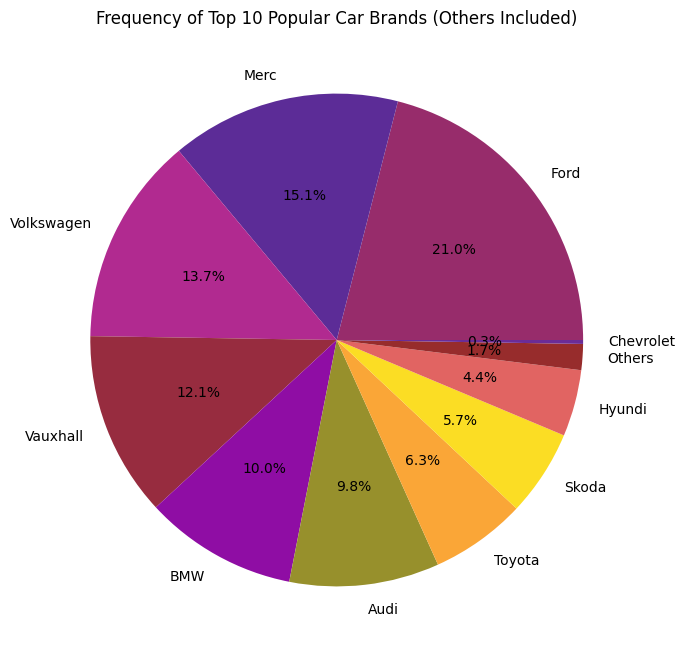

In [180]:

import matplotlib.pyplot as plt
#Identify the most popular brands by list frequencies
df_top10 = df
# Count the frequency of each brand
brand_counts = df['brand'].value_counts()

# Identify the top 10 brands
top10_brands = brand_counts.index[:10]

# Replace all brands that are not in the top 10 with 'Others'
df_top10['brand'] = df['brand'].apply(lambda x: x if x in top10_brands else 'Others')

# Recalculate the brand frequencies with 'Others'
consolidated_brand_counts = df_top10['brand'].value_counts()

# Plotting the pie chart for the top 10 brands + "Others"
plt.figure(figsize=(10, 8))
consolidated_brand_counts.plot(kind='pie', autopct='%1.1f%%', colors = ['#972C6B','#5C2C97','#b12a90','#972C3F','#8f0da4','#97902C','#faa637','#fbdd24','#e16462','#972C2C','#6B2C97'])
plt.title('Frequency of Top 10 Popular Car Brands (Others Included)')
plt.ylabel('')  # Hide the y-label for clarity
plt.show()

Based on the counts of each brand listed in the dataset, we identified the 10 most popular brands, and Ford takes one-fifth of the total. Given the fact that most of our data are from the UK second-hand car market, one key observation is that most of the top 10 brands are either from Germany or the USA, indicating the large market share of car manufacturers from the two countries.


<font face="Helvetica" size=5 color=2e062f> **Q. What numeric variables affect the price the most?** <font>
---

Text(0.5, 1.0, 'Correlation of numeric features')

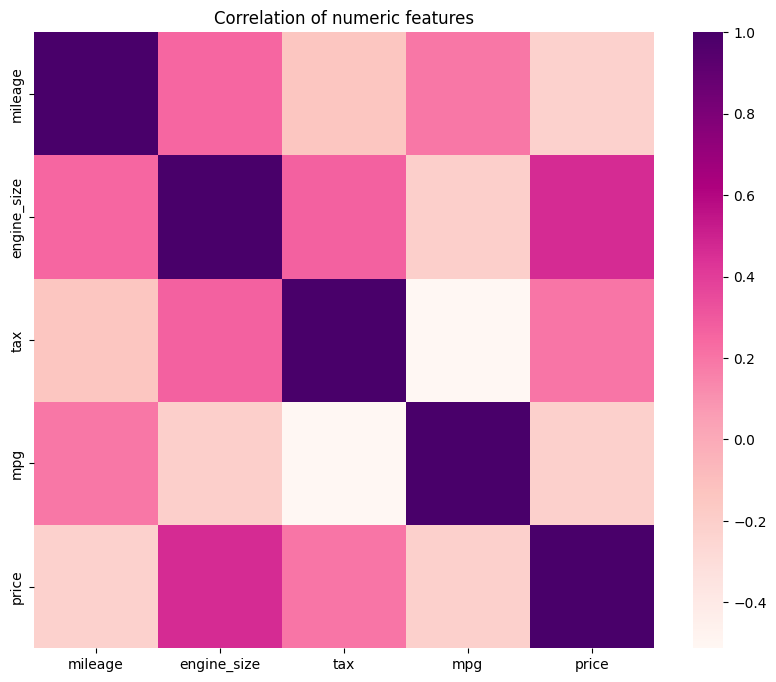

In [181]:
numeric_columns_corr = numeric_columns.corr()
plt.figure(figsize=(10,8))
sns.heatmap(numeric_columns_corr,cmap ='RdPu')
plt.title('Correlation of numeric features')

Based on the correlation heatmap, prices of used cars are highly positively correlated with engine sizes and tax while negatively correlated with mileage and miles per gallon(mpg) feature.

The mileage and mpg demonstrate a slight positive correlation. The correlation between mpg and engine size is negative, as smaller engines are generally more fuel-efficient because they require less fuel.

Besides numeric values, we would also like to explore the categorical features of used cars.




<font face="Helvetica" size=5 color=2e062f> **Q. Does engine_size show a positive correlation with car price based on the previous correlation matrix?** <font>
---

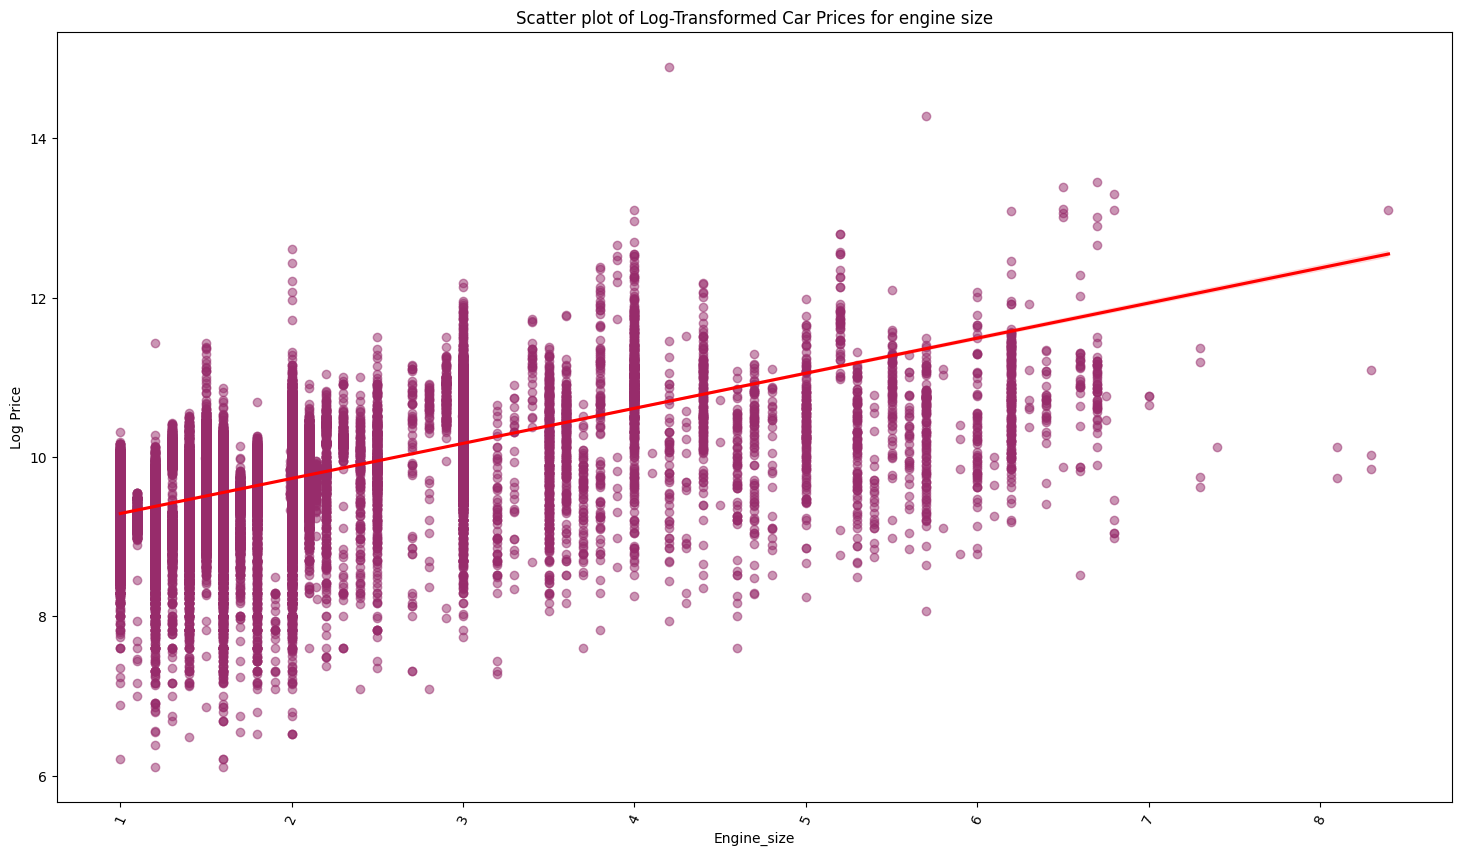

In [182]:
# Price VS mileage, across fuel types
df['log_price'] = np.log1p(df['price'])  # Using log1p to handle small price values
plt.figure(figsize=(18, 10))
#sns.scatterplot(x='mileage', y='log_price', data=df, hue = df["fuelType"])
df_filter = df[df["engine_size"] != 0]
sns.regplot(x='engine_size', y='log_price', data=df_filter, scatter_kws = {"color": "#972C6B", "alpha": 0.5}, line_kws = {"color": "red"})
plt.title('Scatter plot of Log-Transformed Car Prices for engine size')
plt.xlabel('Engine_size')
plt.ylabel('Log Price')
plt.xticks(rotation=65)
plt.show()

There is a Positive Correlation between Engine Size and Price. As engine size increases, the price tends to rise. However, despite the trend, there is significant variability in prices for a given engine size. This means that factors other than engine size likely influence car prices.

Another interesting point is that for larger engine sizes, points deviate significantly from the trend, indicating those outliers may represent luxury or high-performance vehicles with disproportionately high prices.





<font face="Helvetica" size=5 color=2e062f> **Q. Is the car price in UK more expensive than the car price in USA when the car is the same brand?** <font>
---

        brand      price_UK     price_USA
0        Audi  22853.956081  36390.358382
1         BMW  22709.187365  39218.489552
2        Ford  12471.546972  34704.321330
3        Merc  24552.025338  51089.060714
4      Toyota  12493.574873  29612.413408
5  Volkswagen  16807.898073  20953.169811


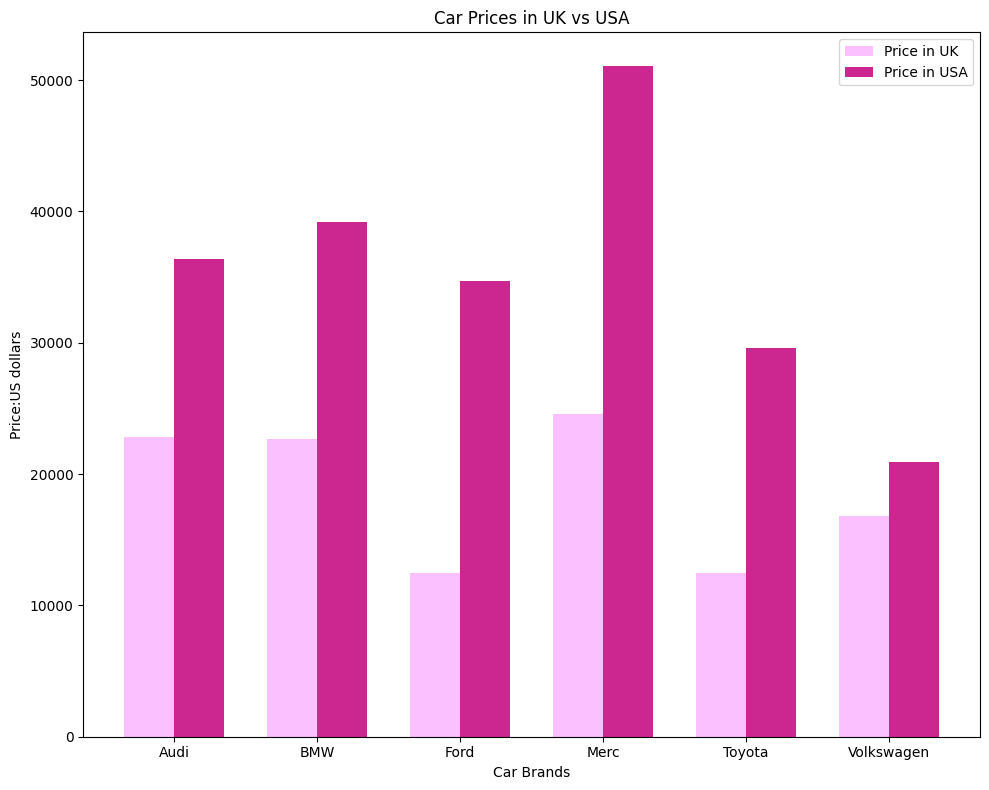

In [183]:
#filter the brand that available in bith UK and USA
UK_car = used_cars[used_cars['country'] == 'UK']
UK_car = UK_car[UK_car["brand"].isin(["Audi", "BMW", "Ford", "Hyundai", "Merc", "Toyota", "Volkswagen"])]
USA_car = used_cars[used_cars['country'] == 'USA']
USA_car = USA_car[USA_car["brand"].isin(["Audi", "BMW", "Ford", "Hyundai", "Merc", "Toyota", "Volkswagen"])]

# groupby the
avg_UK_car = UK_car.groupby("brand")["price"].mean().reset_index()
avg_USA_car = USA_car.groupby("brand")["price"].mean().reset_index()
avg_UK_car = avg_UK_car.rename(columns = {"price" : "price_UK"})
avg_USA_car = avg_USA_car.rename(columns = {"price" : "price_USA"})


avg_car_price = avg_UK_car.merge(avg_USA_car, on = "brand", how = 'inner')
print(avg_car_price)


plt.figure(figsize=(10, 8))
bar_width = 0.35
index = range(len(avg_car_price))

# Plotting the UK prices
plt.bar(index, avg_car_price['price_UK'], bar_width, label='Price in UK', color="#fac0ff")

# Plotting the USA prices with an offset
plt.bar([i + bar_width for i in index], avg_car_price['price_USA'], bar_width, label='Price in USA', color="#cc2790")

# Adding labels and title
plt.xlabel('Car Brands')
plt.ylabel('Price:US dollars')
plt.title('Car Prices in UK vs USA')
plt.xticks([i + bar_width / 2 for i in index], avg_car_price['brand'])
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

To answer the question above, we filter the brands that are available in both the USA and the UK, group the data by these brands, and calculate the average values for each country.  Based on the chart, it is surprising that the average car price in the UK is cheaper in the USA. Especially Ford, the USA car brand, sell higher price in USA than in UK.



<font face="Helvetica" size=5 color=2e062f> **Q. What is the most common transmission type among each fuel type of US and UK cars?** <font>
---

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Figure size 1000x800 with 0 Axes>

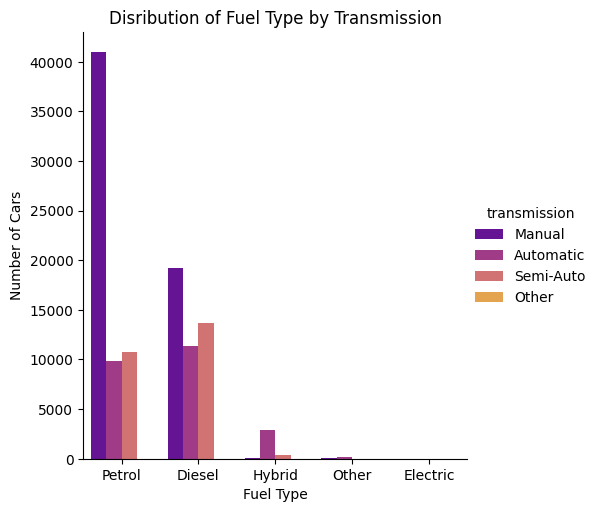

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
df_final = used_cars
plt.figure(figsize=(10, 8))
sns.catplot(x="fuelType", kind="count", hue='transmission', palette= "plasma", data=df_final)
plt.title('Disribution of Fuel Type by Transmission')
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")
plt.show()

This visualization provides valuable insights into the relationship between fuel types and transmission systems in cars, highlighting the most common pairings. By examining the data, we can better understand which transmission types are prevalent across different fuel types and identify potential trends or patterns.
As indicated by the bar chart, petrol-powered cars predominantly feature manual transmissions, with significantly fewer automatic and semi-automatic options available. In the case of diesel vehicles, manual transmissions remain the most common, but the gap between manual and automatic/semi-automatic is narrower, with only around 1,000 fewer cars equipped with these transmission types. Hybrid cars, on the other hand, show a clear preference for automatic transmissions, with only a small proportion utilizing other transmission types.
This analysis is useful for understanding consumer preferences and market trends in the used car industry in the USA and UK, helping both sellers and buyers understand which fuel-transmission combinations are the most popular. Understanding these trends can assist in setting competitive prices, as cars with less common fuel-transmission pairings may command a premium due to their rarity.


<font face="Helvetica" size=6 color=972c6b> **Conclusion** <font>

----

Through the process of EDA, we examined the relationships between various variables. Notably, the correlation between engine size and price was the highest and positively correlated, which was further confirmed by the scatter plot, one of our visualizations. This result slightly surprised us, as we initially expected mileage to have the strongest correlation with price. However, upon further reflection, it makes sense—vehicles with larger engines tend to have higher costs, which drives up their overall price. Although the correlations of other variables appear to be lower, it’s too early to draw firm conclusions. Correlation only measures linear relationships, so other variables may have more complex, non-linear relationships with price that we have yet to explore.

In addition, we discovered that the average car price in the U.S. is generally higher than in the U.K., even for American brands like Ford. However, this may be explained by Ford’s pricing strategy, as it holds the highest market share in the used car markets of both countries. On the other hand, the British car manufacturer Vauxhall, while performing decently, is outperformed by several foreign brands, such as Mercedes, which is worth noting.

Lastly, we observed the distribution of fuel types and transmission systems across cars. It’s interesting to note that manual transmission is still prevalent for both petrol and diesel vehicles. This is understandable for diesel cars, as most are commercial vehicles that traditionally use manual transmission. However, we would have expected petrol cars to predominantly feature automatic transmissions. On the other hand, most hybrid cars come with automatic transmissions, though their numbers remain relatively low. We speculate that this discrepancy may stem from the dataset itself, which spans from 1996 to 2024. Older petrol cars were likely equipped with manual transmissions, and hybrid transmission systems are a more recent innovation. This could explain why manual transmissions are still common in petrol cars and why there are so few hybrids in the dataset.


<font face="Helvetica" size=6 color=972c6b> **References** <font>

----


* Car engine sizes explained: https://www.carwow.co.uk/guides/choosing/what-engine-size-do-i-need-0521#gref


* Engine size conversion chart: https://www.cjponyparts.com/resources/engine-size-chart?srsltid=AfmBOoptnLJ8H7BknSmYM8FATG8py7YvqI5qAB0Kf8MEw9mb0cZ6Vz4v


* Diesel engines can be up to 40% more efficient than petrol engines:
https://www.acea.auto/fact/differences-between-diesel-and-petrol/


<font face="Helvetica" size=6 color=972c6b> **Generative AI Discolure** <font>

----



<font face="Helvetica" size=5 color=2e062f> **Generative AI Disclosure Statement**<font>



 We have utilized Generative AI tools to assist with various aspects of this project. Below describe the criteria we used the tools:

* **Content Generation:**  ChatGPT was used to brainstorm ideas on EDA
* **Code Debugging:** Intellicode and ChatGPT suggested ways to improve our Python code, including providing example code, optimizing algorithms, and resolving potential errors.

* **Proofreading and Grammar Checks:** We used Grammarly and Chatgpt to refine our writing, improve readability, and ensure grammatical accuracy.

* **Fact Check for key observations:** Utilized ChatGPT as a resource to fact check assumptions and statements made in the analysis process.

* **Assistance with code:** Generative AI was utilized to correctly code the for loop, enabling the generation of brand-specific graphs depicting the relationship between mean price and mileage.

* **Assistance with code:** utilize generative AI to suggest the correlation in data that is able to match and create findings based on the research proposal
Assistance with code: ChatGPT was used to debug the codes for data visualization.

Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.
